In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from mplsoccer import Radar, FontManager, grid

In [219]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [220]:
df = pd.read_csv('datasets/fbref_stats.csv')
# df.head()

In [221]:
columns_for_df = ("Player", "Season", "Position Grouped", "Team Name", "Age", "MP", "Starts", "Min", "90s", "Gls", "Ast", "CrdY", "CrdR", "Cmp%", "1/3", "Prog", "Int", "Blocks", "Def", "Tkl", "TklW", "Def 3rd",
                  "Mid 3rd", "Tkl%", "Past", "ShSv", "Pass", "Tkl+Int", "Clr", "Err", "Touches", "Def Pen", "PPM", "onGA", "On-Off", "onxGA", "xG+/-90", "Recov", "Won", "Lost",
                  "Won%")

# "GA90", "SoTA", "W", "D", "L", "CS%"

In [222]:
dfnew = df[list(columns_for_df)].copy()
dfnew.head()

,Player,Season,Position Grouped,Team Name,Age,MP,Starts,Min,90s,Gls,...,Def Pen,PPM,onGA,On-Off,onxGA,xG+/-90,Recov,Won,Lost,Won%
0,Aaron Cresswell,2017-2018,Defender,West Ham,27,36,35,3069,34.1,1,...,125.0,1.14,60.0,0.84,51.5,-0.40,277.0,70.0,57.0,55.1
1,Aaron Hunt,2017-2018,Midfielder,Hamburger SV,30,28,26,2081,23.1,3,...,28.0,1.07,34.0,0.58,31.3,-0.18,213.0,22.0,37.0,37.3
2,Aaron Lennon,2017-2018,Midfielder,Burnley,30,14,13,1118,12.4,0,...,19.0,1.43,15.0,0.36,15.4,-0.12,80.0,7.0,15.0,31.8
3,Aaron Lennon,2017-2018,Forward,Everton,30,15,9,793,8.8,0,...,7.0,1.27,14.0,0.63,13.7,-0.19,50.0,6.0,12.0,33.3
4,Aaron Mooy,2017-2018,Midfielder,Huddersfield,26,36,34,3067,34.1,4,...,65.0,0.94,52.0,-0.03,49.8,-0.62,455.0,35.0,42.0,45.5


In [223]:
# print(dfnew.dtypes)

I believe only taking into account players who have played 30 starts should be considered as they're less likely to be outliers as their skill level would be higher.

In [224]:
dfdef = dfnew[(dfnew["Position Grouped"] == "Defender") & (dfnew["Season"] == "2018-2019") & (dfnew["Starts"] >= 30)].reset_index(drop=True)
dfdef.drop(dfdef[dfdef["Player"] == "Virgil van Dijk"].index, axis=0).reset_index(drop=True)
# dfdef[dfdef['Player'].str.contains('Virgil Van Dijk')]
dfdef

,Player,Season,Position Grouped,Team Name,Age,MP,Starts,Min,90s,Gls,...,Def Pen,PPM,onGA,On-Off,onxGA,xG+/-90,Recov,Won,Lost,Won%
0,Aaron Wan-Bissaka,2018-2019,Defender,Crystal Palace,20,35,35,3134,34.8,0,...,179.0,1.31,46.0,0.29,44.2,0.07,292.0,31.0,34.0,47.7
1,AarÃ³n MartÃ­n,2018-2019,Defender,Mainz 05,21,33,32,2878,32.0,0,...,120.0,1.30,50.0,3.34,53.9,-0.21,265.0,14.0,25.0,35.9
2,Aleksandar Kolarov,2018-2019,Defender,Roma,32,33,32,2906,32.3,8,...,128.0,1.73,41.0,0.76,47.6,0.25,303.0,28.0,20.0,58.3
3,Alessio Romagnoli,2018-2019,Defender,Milan,23,32,32,2847,31.6,2,...,306.0,1.69,32.0,-0.72,33.0,0.16,263.0,70.0,26.0,72.9
4,Alexander Djiku,2018-2019,Defender,Caen,23,31,31,2754,30.6,1,...,223.0,0.94,40.0,-0.15,43.1,-0.51,358.0,62.0,41.0,60.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Yunis Abdelhamid,2018-2019,Defender,Reims,30,38,38,3420,38.0,0,...,310.0,1.45,42.0,NaN,44.9,-0.11,327.0,88.0,47.0,65.2
162,Yuri Berchiche,2018-2019,Defender,Athletic Club,28,35,35,3120,34.7,2,...,113.0,1.40,40.0,0.54,39.1,-0.10,394.0,66.0,33.0,66.7
163,Zeki Ãelik,2018-2019,Defender,Lille,21,34,34,2971,33.0,1,...,94.0,2.06,26.0,0.83,37.2,0.41,300.0,15.0,28.0,34.9
164,Ãlex Moreno,2018-2019,Defender,Rayo Vallecano,25,36,36,3136,34.8,1,...,129.0,0.86,60.0,0.90,48.3,-0.32,329.0,19.0,34.0,35.8


In [225]:
# dfdef.hist(figsize=(12,8))

In [226]:
for column in dfdef.columns:
    has_nan = dfdef[column].isna().any()
    if has_nan:
        print(f"'{column}' column has NaN values.")

'On-Off' column has NaN values.


In [227]:
for column in dfdef.columns:
    has_nan = dfdef[column].isna().any()
    if has_nan:
        median = dfdef[column].median()
        mean = dfdef[column].mean()
        print(f"'{column}' column mean: {mean}")
        print(f"'{column}' column median: {median}")
        skewness = dfdef[column].skew()
        print(f"'{column}' 's skewness", skewness)
        
'''
It seems like filling NaN values with median is the best option for this dataset as most of the distributions are skewed.
'''

'On-Off' column mean: 0.201055900621118
'On-Off' column median: 0.18
'On-Off' 's skewness -4.914653855004875


'\nIt seems like filling NaN values with median is the best option for this dataset as most of the distributions are skewed.\n'

In [228]:
dfdef.fillna(dfdef.median(), inplace=True)

C:\Users\Aykut\AppData\Local\Temp\ipykernel_17836\1041820624.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfdef.fillna(dfdef.median(), inplace=True)


In [229]:
for column in dfdef.columns:
    has_nan = dfdef[column].isna().any()
    if has_nan:
        print(f"'{column}' column has NaN values.")

In [230]:
dfvvd = dfdef[(dfdef["Player"] == "Virgil van Dijk") & (dfdef["Season"] == "2018-2019")].reset_index(drop=True)
dfvvd.head()

,Player,Season,Position Grouped,Team Name,Age,MP,Starts,Min,90s,Gls,...,Def Pen,PPM,onGA,On-Off,onxGA,xG+/-90,Recov,Won,Lost,Won%
0,Virgil van Dijk,2018-2019,Defender,Liverpool,27,38,38,3384,37.6,4,...,264.0,2.55,22.0,1.78,30.4,1.17,524.0,156.0,39.0,80.0


In [231]:
numeric_columns = dfdef.select_dtypes(include='number').columns
average_row = pd.DataFrame(dfdef[numeric_columns].mean()).T
average_row['Player'] = 'Average Defender'
average_row['Season'] = '2018-2019'
average_row['Position Grouped'] = 'Defender'
dfdef = dfdef.append(average_row, ignore_index=True)

C:\Users\Aykut\AppData\Local\Temp\ipykernel_17836\4251032168.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdef = dfdef.append(average_row, ignore_index=True)


In [232]:
dfdef[dfdef['Player'].str.contains('Average Defender')]

,Player,Season,Position Grouped,Team Name,Age,MP,Starts,Min,90s,Gls,...,Def Pen,PPM,onGA,On-Off,onxGA,xG+/-90,Recov,Won,Lost,Won%
166,Average Defender,2018-2019,Defender,NaN,26.289157,33.740964,33.277108,2957.644578,32.859639,1.608434,...,191.337349,1.375422,43.433735,0.200422,43.03253,-0.008976,325.975904,58.789157,37.337349,58.290964


In [233]:
params = ["Cmp%", "1/3", "Prog", "Int", "Blocks", "Def", "Tkl", "TklW", "Def 3rd",
                  "Mid 3rd", "Tkl%", "Past", "ShSv", "Pass", "Tkl+Int", "Clr", "Err", "Touches", "Def Pen", "PPM", "onGA", "On-Off", "onxGA", "xG+/-90", "Recov", "Won%"]

paramsradar = ["Pass Completion Ratio", "Passes to 1/3 ", "Progressive Passes", "Interceptions", "Blocks", "Def2Shot", "No. of Players Tackled", "Tackles Won", "Tackles in def 3rd",
                "Tackles in mid 3rd", " Percentage of dribblers tackled", "Dribbled past", "Blocked Shots", "Blocked Passes", "Tackles+Interceptions", "Clearances", "Errors2Shot", "Touches",
                "Touches in defensive penalty area", "Points per Match", "Goals allowed", "+/- p90", "xGoalsAllowed", "xG +/- p90", "Loose balls recovered", "Aerial duel success rate"]

low = dfdef[params].min().tolist()
high = dfdef[params].max().tolist()

lower_is_better = ['Miscontrol']

radar = Radar(paramsradar, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)


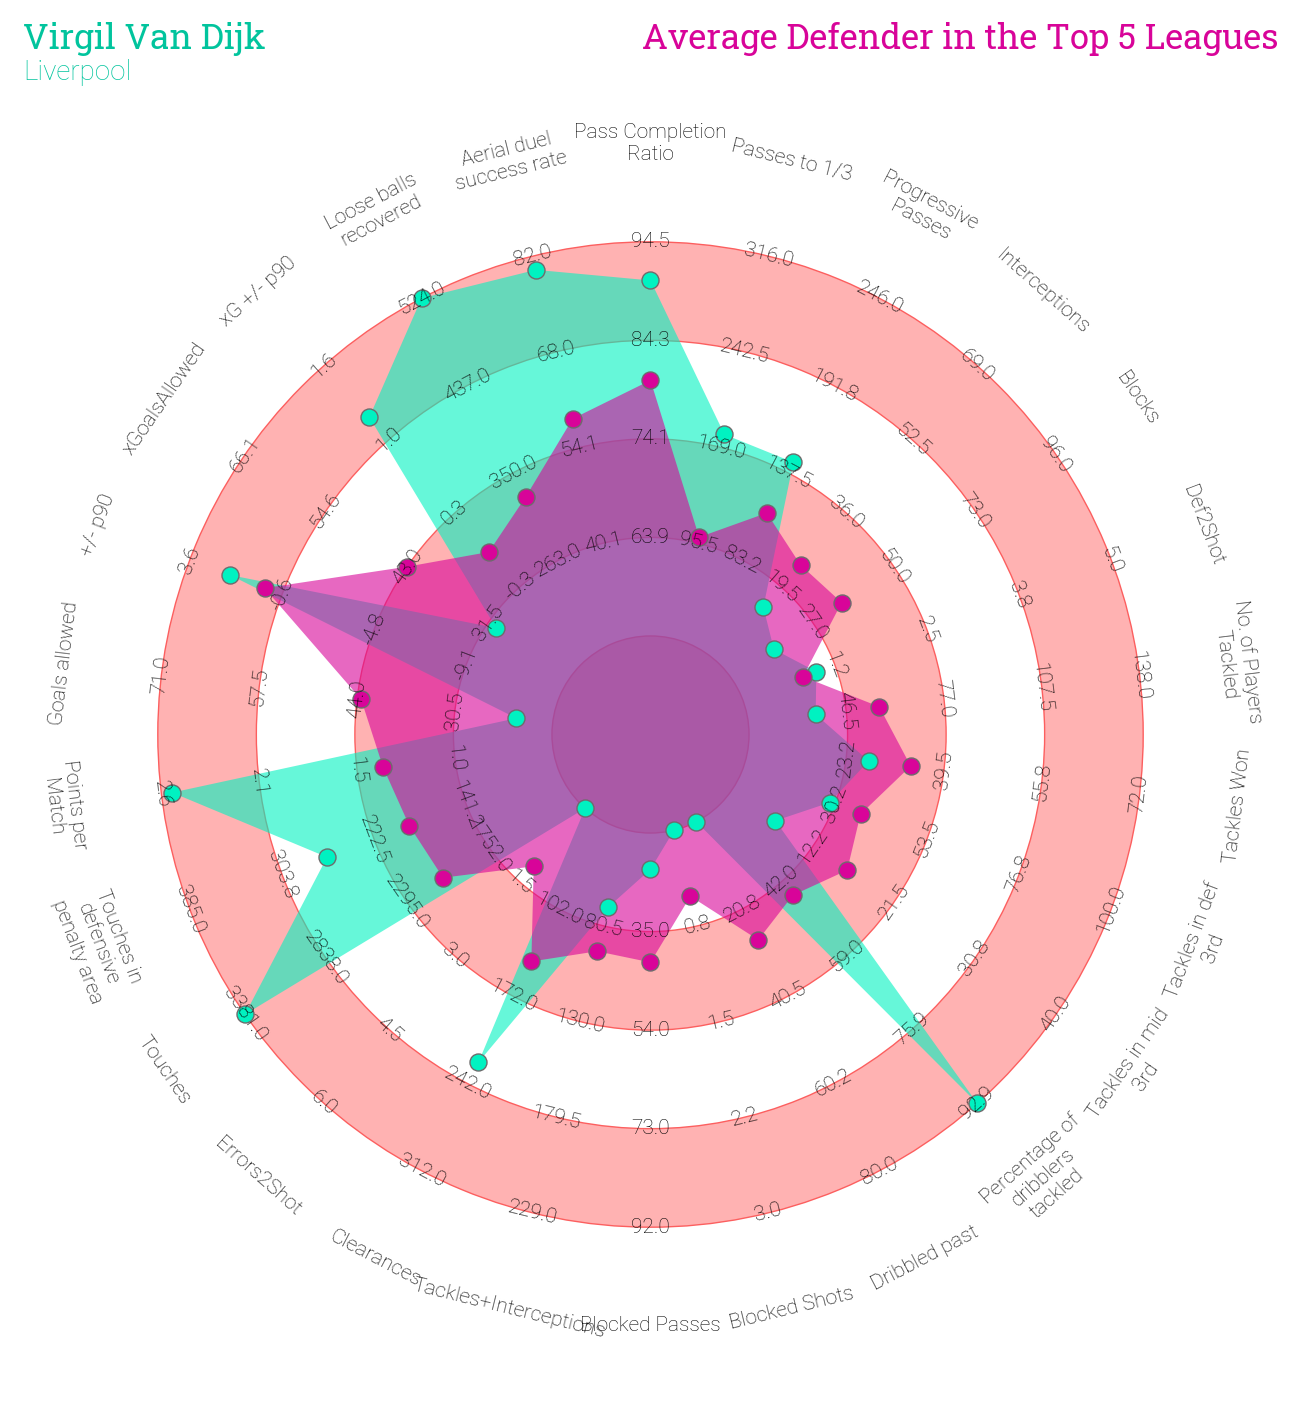

In [234]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
average_values = dfdef.loc[dfdef['Player'] == "Average Defender"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(vvd_values, average_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Average Defender in the Top 5 Leagues', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

As defender of Liverpool, one of the world's strongest sides at the time, Van Dijk isn't expected to have high numbers in stats related to tackling, shot blocking, blocks and interceptions etc. Because Liverpool would have generally had more of the ball, low numbers in these stats don't indicate much. Let us test this by checking Liverpool's statistics that year.

In [235]:
teamstats = pd.read_csv('datasets/top5leagueteams.csv')
teamstats.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,eng ENG,1,38,32,2,4,95,23,72,98,2.58,84.3,24.7,59.6,1.57,54130,Sergio Agüero - 21,Ederson
1,2,Liverpool,eng ENG,2,38,30,7,1,89,22,67,97,2.55,73.7,28.8,44.9,1.18,52983,Sadio Mané Mohamed Salah - 22,Alisson
2,3,Paris S-G,fr FRA,1,38,29,4,5,105,35,70,91,2.39,88.9,37.6,51.3,1.35,46911,Kylian Mbappé - 33,Alphonse Areola
3,4,Juventus,it ITA,1,38,28,6,4,70,30,40,90,2.37,60.7,35.8,25.0,0.66,37799,Cristiano Ronaldo - 21,Wojciech Szczęsny
4,5,Bayern Munich,de GER,1,34,24,6,4,88,32,56,78,2.29,85.6,27.2,58.4,1.72,75000,Robert Lewandowski - 22,Manuel Neuer


In [236]:
for column in teamstats.columns:
    has_nan = teamstats[column].isna().any()
    if has_nan:
        print(f"'{column}' column has NaN values.")

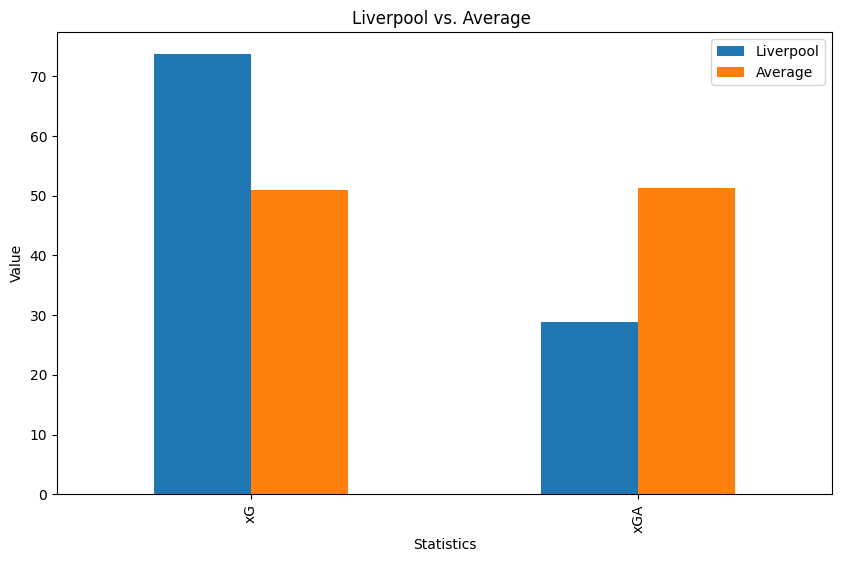

In [237]:

team_name = "Liverpool"
team_stats = teamstats[teamstats['Squad'] == team_name].iloc[0]


average_stats = teamstats[teamstats['Squad'] != team_name][['xG', 'xGA']].mean()


comparison_stats = pd.concat([team_stats[['xG', 'xGA']], average_stats], axis=1)
comparison_stats.columns = ['Liverpool', 'Average']

fig, ax = plt.subplots(figsize=(10, 6))
comparison_stats.plot(kind='bar', ax=ax)
ax.set_xlabel('Statistics')
ax.set_ylabel('Value')
ax.set_title(f'{team_name} vs. Average ')
plt.show()


As seen here, Liverpool have much higher xG and much lower xGA then the average in the top 5 leagues. Now let's check possesion data.

In [238]:
posstats = pd.read_csv('datasets/possesiontop5leagues.csv')
posstats.head() 
pos = posstats[["Squad", "Poss", "PrgC", "PrgP"]]
pos.head()

,Squad,Poss,PrgC,PrgP
0,Arsenal,58.1,868,1874
1,Bournemouth,46.9,738,1435
2,Brighton,42.4,475,1150
3,Burnley,41.2,421,1032
4,Cardiff City,35.4,434,918


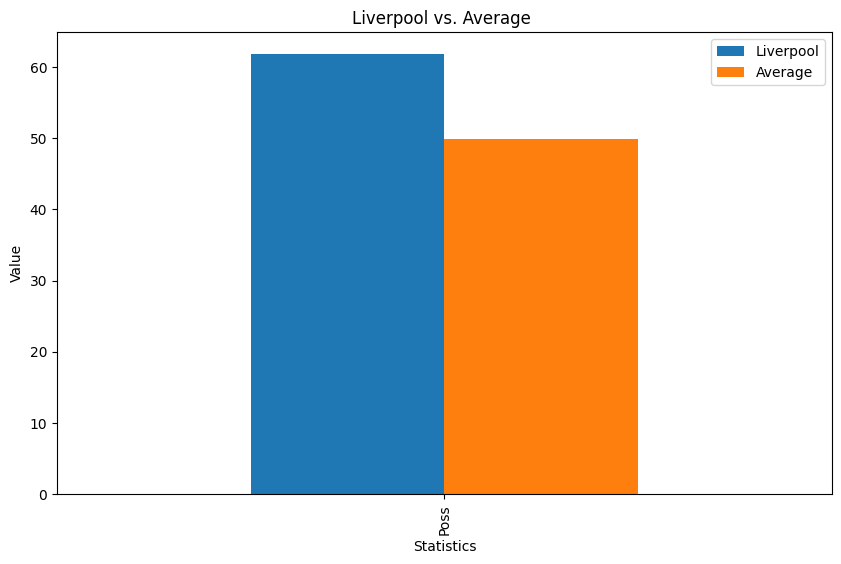

In [239]:
pos_stats = pos[pos['Squad'] == team_name].iloc[0]

average_pos_stats = pos[pos['Squad'] != team_name][['Poss']].mean()

# Combine team stats and average stats into a single DataFrame
comparison_stats = pd.concat([pos_stats[['Poss']], average_pos_stats], axis=1)
comparison_stats.columns = ['Liverpool', 'Average']

# Plot the statistics
fig, ax = plt.subplots(figsize=(10, 6))
comparison_stats.plot(kind='bar', ax=ax)
ax.set_xlabel('Statistics')
ax.set_ylabel('Value')
ax.set_title(f'{team_name} vs. Average ')
plt.show()

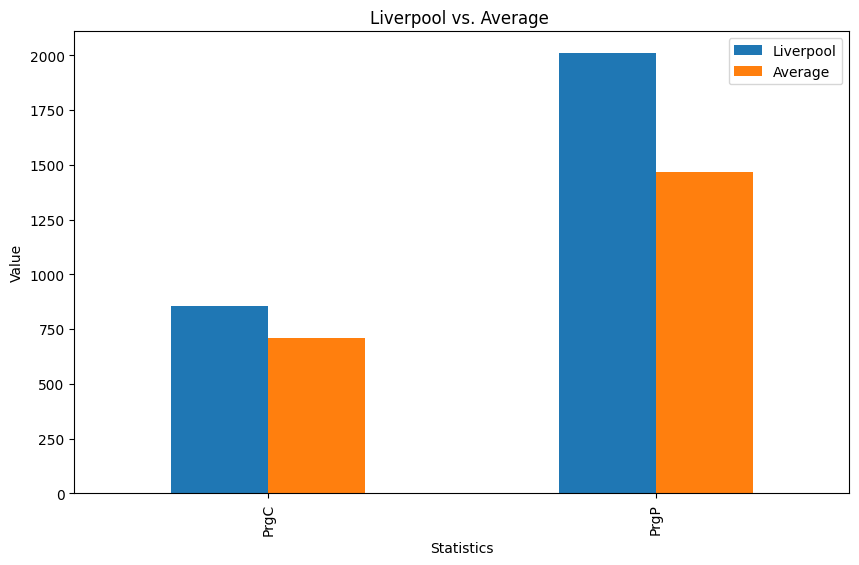

In [240]:
average_prg_stats = pos[pos['Squad'] != team_name][['PrgC', "PrgP"]].mean()

# Combine team stats and average stats into a single DataFrame
comparison_stats = pd.concat([pos_stats[['PrgC', 'PrgP']], average_prg_stats], axis=1)
comparison_stats.columns = ['Liverpool', 'Average']

# Plot the statistics
fig, ax = plt.subplots(figsize=(10, 6))
comparison_stats.plot(kind='bar', ax=ax)
ax.set_xlabel('Statistics')
ax.set_ylabel('Value')
ax.set_title(f'{team_name} vs. Average ')
plt.show()


As seen in these charts, Liverpool have a massive advantage in terms of possesion, which results in more progressive carries and passes as they're the dominant side in the match.

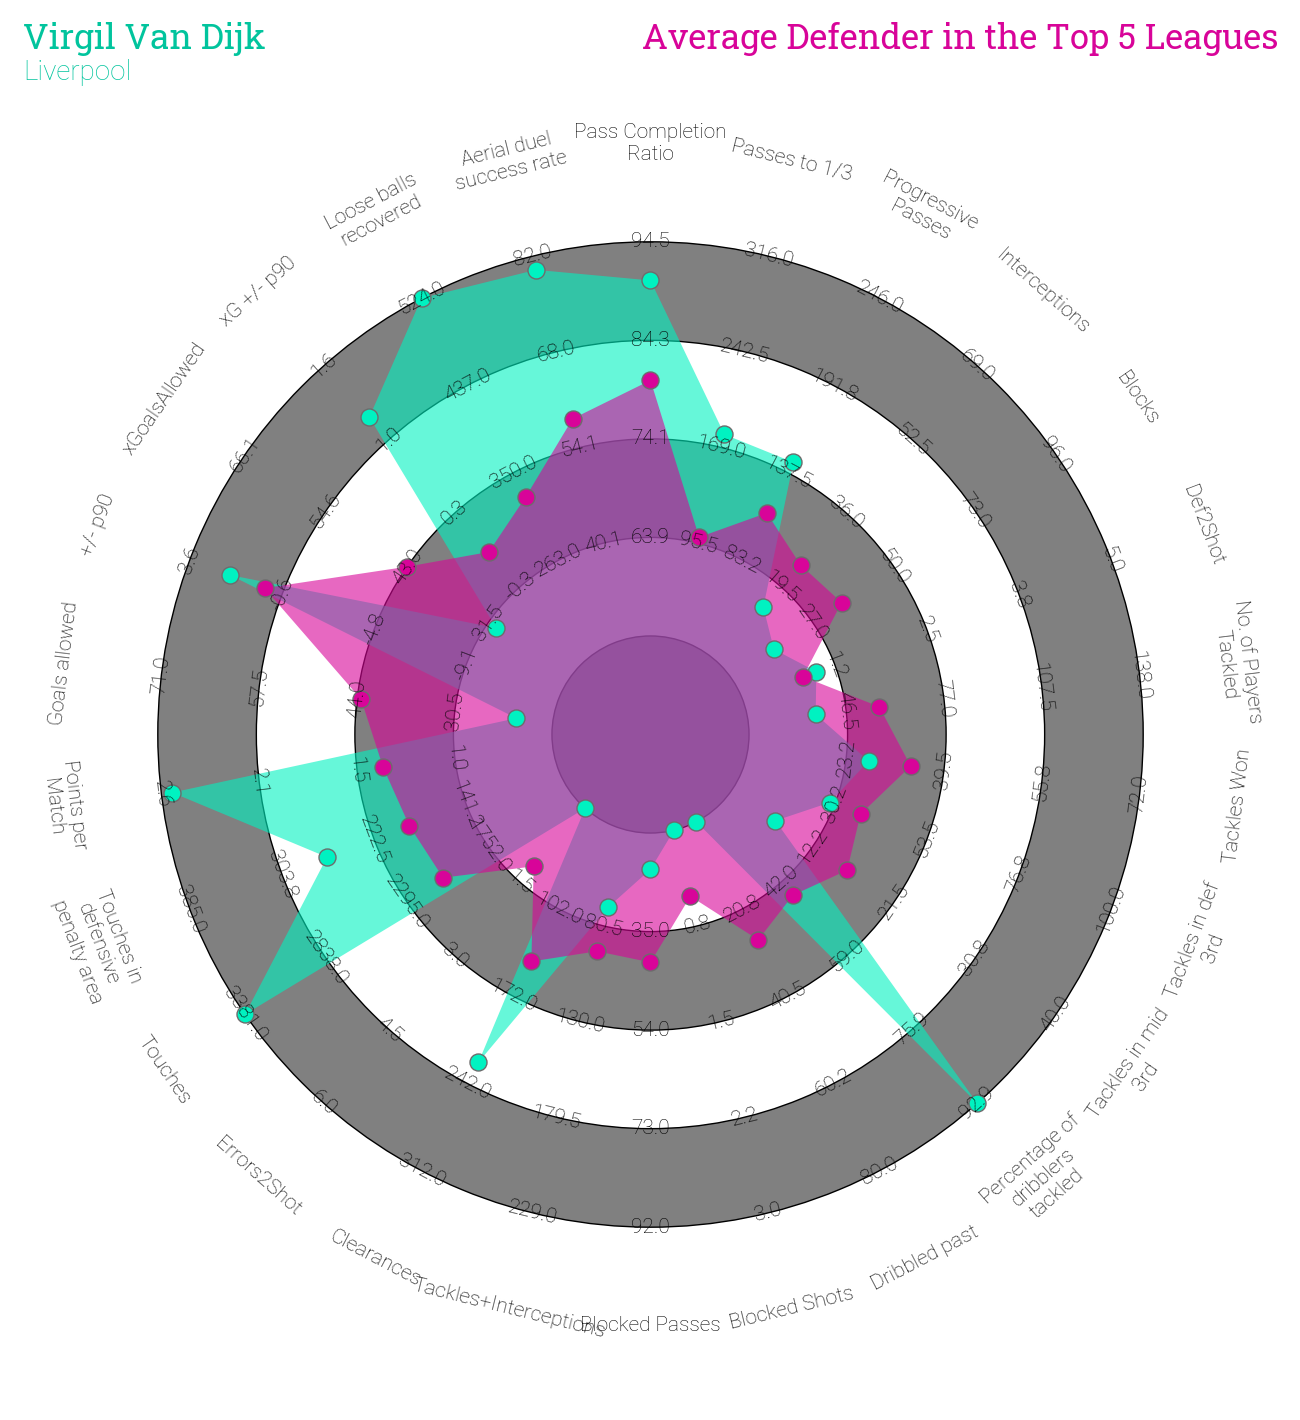

In [241]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
average_values = dfdef.loc[dfdef['Player'] == "Average Defender"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, average_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Average Defender in the Top 5 Leagues', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

As we said before, defensive stats aren't what makes Van Dijk special, though he does boast a whooping 92,9% tackling ratio. It's his ability to play the ball out of the back and start attacks. As seen on the radar, van Dijk's stats in terms of: touches, passes to final third, progressive passes and pass completion ratio are way above average for a defender.

The question we asked in the beginning was, was van Dijk the best defender of the 2018-2019 season and did he deserve to be 2nd place in the Ballon d'Or rankings. Attacking wise, we can confidently say that van Dijk made a massive impact on the way his team attacked. Defending wise, we need to delve in deeper. After that, we will start comparing him with the other elite defenders of football.

To create an equal environment, we will be comparing defensive performances of teams with the 5 lowest xGA's in the 2018-2019 season. This way we will also compare van Dijk with the world's best defending team's defenders. Although this method is questionable, the Ballon d'Or would only be given to players of the bigger teams in football, so I believe it creates an equal environment for comparison.

In [243]:
sorted_df = teamstats.sort_values('xGA')
lowest_values = sorted_df.head(5).reset_index(drop=True)

print("5 teams with the lowest xGA:")
for index, row in lowest_values.iterrows():
    team = row['Squad']
    xga = row['xGA']
    print(f"{index+1}. {team}: {xga}")

5 teams with the lowest xGA:
1. Manchester City: 24.7
2. Bayern Munich: 27.2
3. Liverpool: 28.8
4. Juventus: 35.8
5. Chelsea: 36.4


Manchester City, Bayern Munich, Liverpool, Juventus and Chelsea have turned out to have the lowest xGA in world football. Now lets see who their defenders are.

In [261]:
dfcity = dfdef[(dfdef["Team Name"] == "Manchester City") & (dfdef["Season"] == "2018-2019")].reset_index(drop=True)
dfcity.head()

,Player,Season,Position Grouped,Team Name,Age,MP,Starts,Min,90s,Gls,...,Def Pen,PPM,onGA,On-Off,onxGA,xG+/-90,Recov,Won,Lost,Won%
0,Aymeric Laporte,2018-2019,Defender,Manchester City,24.0,35.0,34.0,3057.0,34.0,3.0,...,240.0,2.54,21.0,0.73,22.8,1.44,337.0,76.0,39.0,66.1
1,Kyle Walker,2018-2019,Defender,Manchester City,28.0,33.0,30.0,2779.0,30.9,1.0,...,90.0,2.61,17.0,-0.43,20.0,1.45,340.0,36.0,18.0,66.7


Laporte and Walker are the only 2 that fit our "matches started" criteria. Let's compare these 2 players to van Dijk. First, let's start with Kyle Walker, he mostly plays as a full-back, so the results here shouldn't be too decisive.

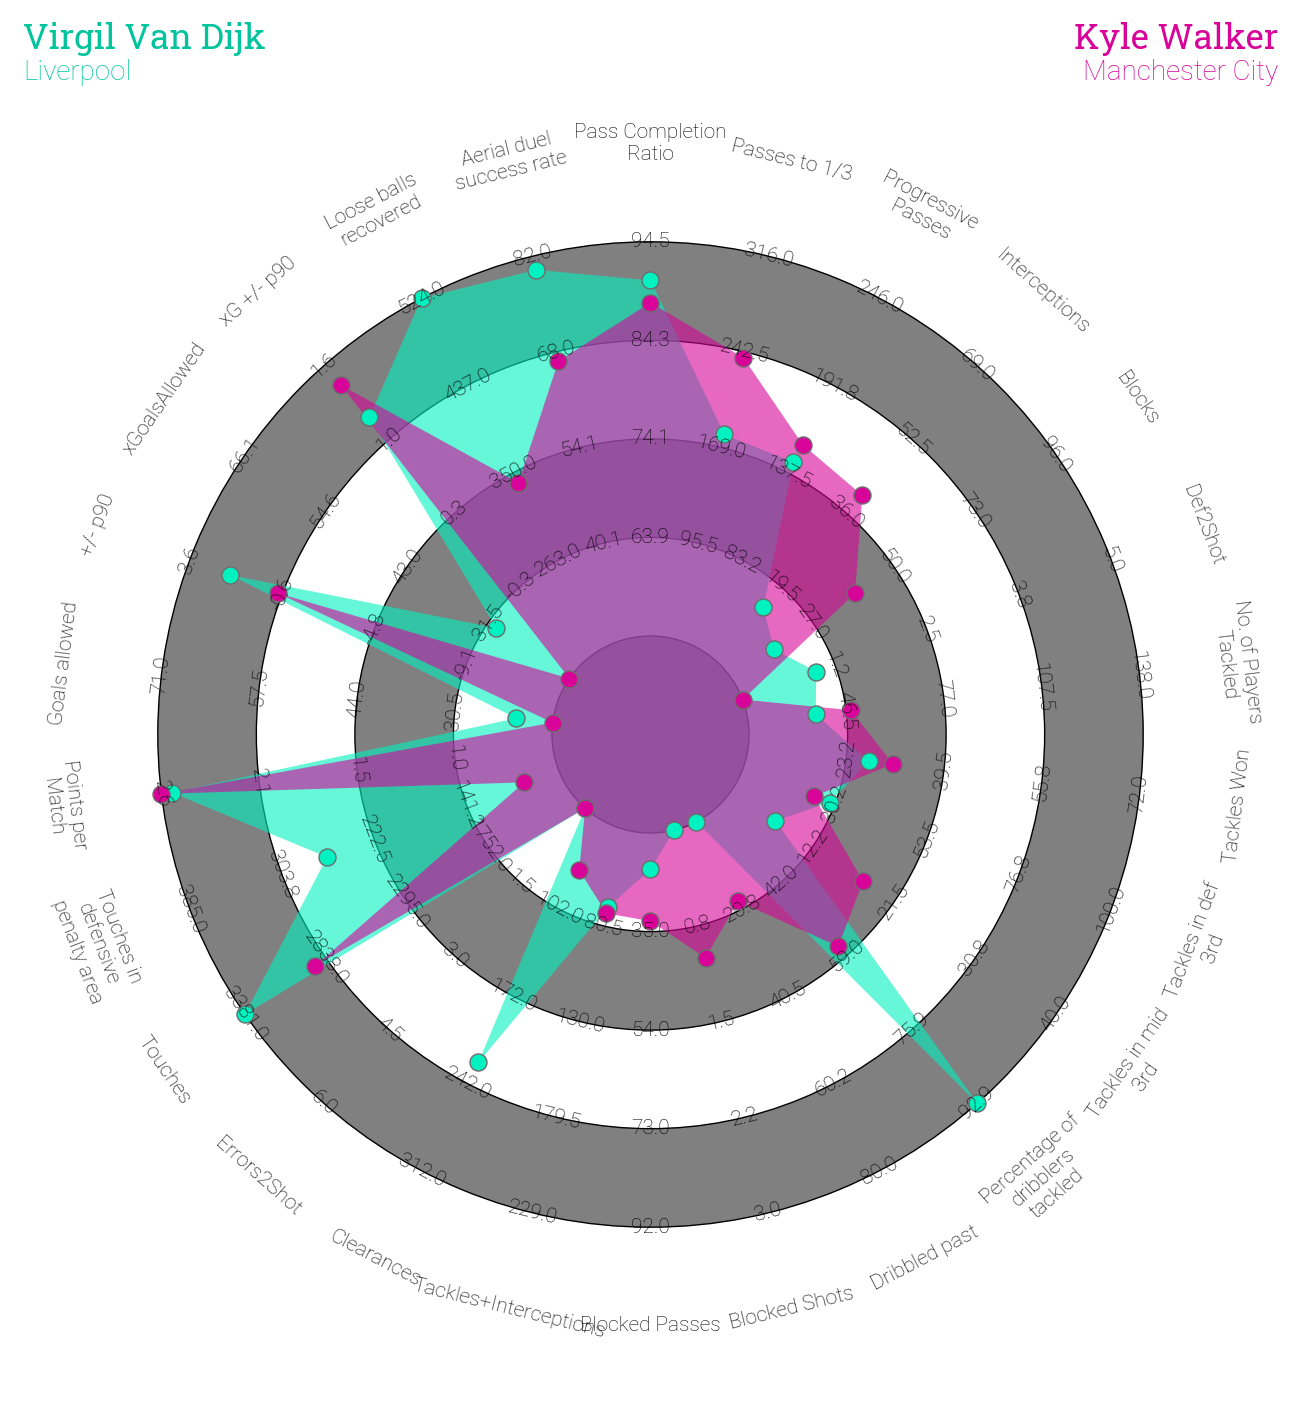

In [262]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
walker_values = dfdef.loc[dfdef['Player'] == "Kyle Walker"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, walker_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Kyle Walker', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Manchester City', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

KYLE WALKER THINGS GO HERE

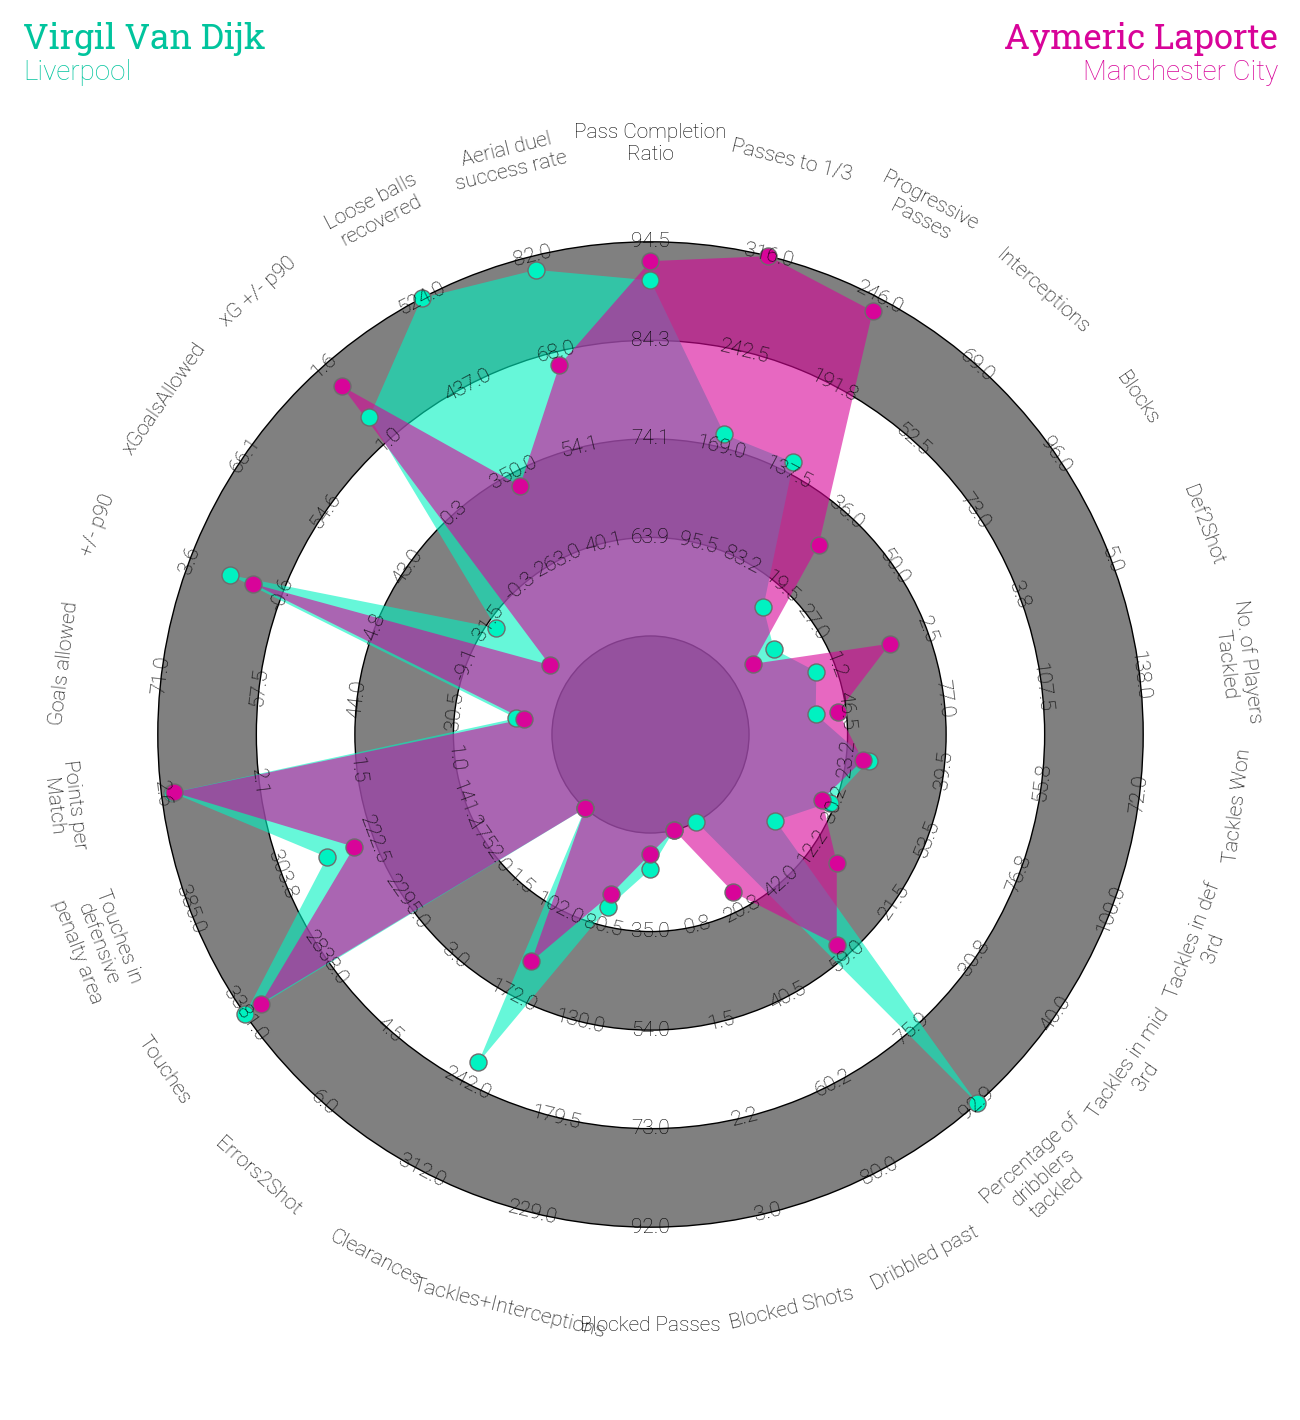

In [263]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
laporte_values = dfdef.loc[dfdef['Player'] == "Aymeric Laporte"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, laporte_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Aymeric Laporte', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Manchester City', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

LAPORTE THINGS GO HERE